In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
%matplotlib
%matplotlib inline
import numpy
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import math
import random

Using matplotlib backend: MacOSX


In [2]:
import gillespy2
from gillespy2.basic_root_solver import BasicRootSolver
from gillespy2.basic_ssa_solver import BasicSSASolver
from gillespy2.basic_hybrid_solver import BasicHybridSolver

Unable to use Cython optimized SSA:
Error:No module named 'pyximport'


In [3]:
class MichaelisMenten(gillespy2.Model):
     def __init__(self, parameter_values=None):
            #initialize Model
            gillespy2.Model.__init__(self, name="Michaelis_Menten")
            
            #parameters
            rate1 = gillespy2.Parameter(name='rate1', expression= 0.000017)
            rate2 = gillespy2.Parameter(name='rate2', expression= 0.005)
            rate3 = gillespy2.Parameter(name='rate3', expression = 0.001)
            self.add_parameter([rate1,rate2,rate3])
            
            #Species
            A = gillespy2.Species(name='A', initial_value=100)
            B = gillespy2.Species(name='B', initial_value=100)
            C = gillespy2.Species(name='C', initial_value=100)
            D = gillespy2.Species(name='D', initial_value=100)
            #DET = gillespy2.Species(name='DET', initial_value=1) #Create a deterministic species
            #Deterministic species will be a regular species, but with "deterministic" flag
            DET = gillespy2.Species(name='DET', initial_value=0, deterministic=True)
            self.add_species([A, B, C, D, DET])
            
            #rate_rules
            rate_rule1 = gillespy2.RateRule(name='rate_rule1', expression="sin(t)", species=DET)
            self.add_rate_rule(rate_rule1)
            
            #reactions
            r1 = gillespy2.Reaction(name="r1",reactants={A:1,B:1}, products={C:1},
                   rate=rate1)
            
            r2 = gillespy2.Reaction(name="r2",reactants={C:1}, products={A:1,B:1},
                    rate=rate2)
            
            r3 = gillespy2.Reaction(name="r3",reactants={C:1}, products={B:1,D:1},
                    rate=rate3)
            r4 = gillespy2.Reaction(name="r4", reactants={C:1}, products={D:1}, propensity_function="rate2*A*DET/vol")
            #r4 uses a deterministic species result as an argument
            self.add_reaction([r1,r2,r3, r4])
            self.timespan(numpy.linspace(0,100,1001))

In [4]:
model = MichaelisMenten()
print(model.listOfRateRules)

Adding rate rule  <gillespy2.gillespy2.RateRule object at 0x1115214a8>  to  Michaelis_Menten
OrderedDict([('DET', <gillespy2.gillespy2.RateRule object at 0x1115214a8>)])


In [16]:
%time results = model.run(solver=BasicHybridSolver(), show_labels=True)
#print(results)

t =  100.0
increment =  0.09999999999999432
Propensity of  r1  is  0.16999999999999998
Propensity of  r2  is  0.5
Propensity of  r3  is  0.1
Propensity of  r4  is  0.0
Curr Time:  0  Save time:  0.09999999999999432  Int Time:  0.09999999999999432
Reaction Fired:  [None]
[-2.01587893 -0.14737465 -0.53301688 -0.26835508  0.00499583]
Propensity of  r1  is  0.16999999999999998
Propensity of  r2  is  0.5
Propensity of  r3  is  0.1
Propensity of  r4  is  0.002497917405878605
Curr Time:  0.09999999999999432  Save time:  0.19999999999998863  Int Time:  0.19999999999998863
Reaction Fired:  [None]
[-1.99887893 -0.09737465 -0.52301688 -0.26810529  0.01993342]
Propensity of  r1  is  0.16999999999999998
Propensity of  r2  is  0.5
Propensity of  r3  is  0.1
Propensity of  r4  is  0.009966711633332584
Curr Time:  0.19999999999998863  Save time:  0.29999999999998295  Int Time:  0.29999999999998295
Reaction Fired:  [None]
[-1.98187893 -0.04737465 -0.51301688 -0.26710862  0.04466352]
Propensity of  r1  

Curr Time:  6.199999999999648  Save time:  6.299999999999642  Int Time:  6.299999999999642
Reaction Fired:  [None]
[-8.54904726e-01 -9.15584396e-01 -1.09165084e-01 -2.55693124e+00
  9.98617241e-05]
Propensity of  r1  is  0.19645200000000002
Propensity of  r2  is  0.435
Propensity of  r3  is  0.08700000000000001
Propensity of  r4  is  5.342602237914525e-05
Curr Time:  6.299999999999642  Save time:  6.399999999999636  Int Time:  6.399999999999636
Reaction Fired:  [None]
[-0.83525953 -0.8720844  -0.10046508 -2.5569259   0.00677358]
Propensity of  r1  is  0.19645200000000002
Propensity of  r2  is  0.435
Propensity of  r3  is  0.08700000000000001
Propensity of  r4  is  0.0036238650848747695
Curr Time:  6.399999999999636  Save time:  6.4999999999996305  Int Time:  6.4999999999996305
Reaction Fired:  [None]
[-0.81561433 -0.8285844  -0.09176508 -2.55656351  0.02337087]
Propensity of  r1  is  0.19645200000000002
Propensity of  r2  is  0.435
Propensity of  r3  is  0.08700000000000001
Propensity 

Curr Time:  10.499999999999403  Save time:  10.599999999999397  Int Time:  10.5662499999994
Curr Time:  10.533124999999401  Save time:  10.599999999999397  Int Time:  10.5496874999994
Reaction Fired:  ['r4']
[-2.48755862e-05 -1.26659268e-01 -2.88509557e+00  2.99033206e-03
  1.43117443e+00]
Propensity of  r1  is  0.20944
Propensity of  r2  is  0.405
Propensity of  r3  is  0.081
Propensity of  r4  is  0.7871459388693299
Curr Time:  10.5496874999994  Save time:  10.599999999999397  Int Time:  10.599999999999397
Reaction Fired:  ['r1']
[ 0.01051257 -0.10628271 -2.88102026 -1.13775398  1.38525494]
Propensity of  r1  is  0.205683
Propensity of  r2  is  0.41000000000000003
Propensity of  r3  is  0.082
Propensity of  r4  is  0.754963940687933
Curr Time:  10.599999999999397  Save time:  10.699999999999392  Int Time:  10.699999999999392
Reaction Fired:  [None]
[-0.93128974 -0.06528271 -2.87282026 -1.06225759  1.29120505]
Propensity of  r1  is  0.205683
Propensity of  r2  is  0.41000000000000003


Curr Time:  16.299999999999073  Save time:  16.399999999999068  Int Time:  16.399999999999068
Curr Time:  16.299999999999073  Save time:  16.399999999999068  Int Time:  16.35124999999907
Reaction Fired:  ['r4']
[-0.00916498 -0.03668655 -2.42852526  0.01679437  1.80001547]
Propensity of  r1  is  0.220915
Propensity of  r2  is  0.375
Propensity of  r3  is  0.075
Propensity of  r4  is  1.0170087431991903
Curr Time:  16.35124999999907  Save time:  16.399999999999068  Int Time:  16.399999999999068
Reaction Fired:  ['r1']
[ 1.60462343e-03 -1.84053047e-02 -2.42486901e+00 -9.50958284e-01
  1.76983352e+00]
Propensity of  r1  is  0.217056
Propensity of  r2  is  0.38
Propensity of  r3  is  0.076
Propensity of  r4  is  0.9911067698437448
Curr Time:  16.399999999999068  Save time:  16.499999999999062  Int Time:  16.499999999999062
Reaction Fired:  ['r2']
[-0.02809974  0.0195947  -2.41726901 -0.85184761  1.7022814 ]
Propensity of  r1  is  0.220915
Propensity of  r2  is  0.375
Propensity of  r3  is  

Reaction Fired:  [None]
[-2.93899114 -2.32345169 -2.00956901 -0.75937742  1.99393591]
Propensity of  r1  is  0.232696
Propensity of  r2  is  0.34
Propensity of  r3  is  0.068
Propensity of  r4  is  1.1564828282761417
Curr Time:  22.099999999998744  Save time:  22.199999999998738  Int Time:  22.199999999998738
Reaction Fired:  [None]
[-2.91572154 -2.28945169 -2.00276901 -0.64372914  1.97812297]
Propensity of  r1  is  0.232696
Propensity of  r2  is  0.34
Propensity of  r3  is  0.068
Propensity of  r4  is  1.1473113212056212
Curr Time:  22.199999999998738  Save time:  22.299999999998732  Int Time:  22.299999999998732
Reaction Fired:  [None]
[-2.89245194 -2.25545169 -1.99596901 -0.52899801  1.95253536]
Propensity of  r1  is  0.232696
Propensity of  r2  is  0.34
Propensity of  r3  is  0.068
Propensity of  r4  is  1.1324705067210896
Curr Time:  22.299999999998732  Save time:  22.399999999998727  Int Time:  22.399999999998727
Reaction Fired:  [None]
[-2.86918234 -2.22145169 -1.98916901 -0.415

Propensity of  r3  is  0.066
Propensity of  r4  is  0.3000457233463963
Curr Time:  26.19999999999851  Save time:  26.299999999998505  Int Time:  26.299999999998505
Reaction Fired:  [None]
[-1.96166794 -0.92995169 -1.73086901 -0.56675629  0.60717336]
Propensity of  r1  is  0.232696
Propensity of  r2  is  0.33
Propensity of  r3  is  0.066
Propensity of  r4  is  0.352160547861133
Curr Time:  26.299999999998505  Save time:  26.3999999999985  Int Time:  26.3999999999985
Reaction Fired:  [None]
[-1.93839834 -0.89695169 -1.72426901 -0.53154024  0.70095006]
Propensity of  r1  is  0.232696
Propensity of  r2  is  0.33
Propensity of  r3  is  0.066
Propensity of  r4  is  0.4065510320669727
Curr Time:  26.3999999999985  Save time:  26.499999999998494  Int Time:  26.499999999998494
Reaction Fired:  [None]
[-1.91512874 -0.86395169 -1.71766901 -0.49088514  0.79771332]
Propensity of  r1  is  0.232696
Propensity of  r2  is  0.33
Propensity of  r3  is  0.066
Propensity of  r4  is  0.46267372685408875
Cur

Reaction Fired:  [None]
[-0.73561094 -0.13669237 -1.40163991 -0.45866927  0.00333712]
Propensity of  r1  is  0.24072
Propensity of  r2  is  0.305
Propensity of  r3  is  0.061
Propensity of  r4  is  0.0019688995591916367
Curr Time:  31.49999999999821  Save time:  31.599999999998204  Int Time:  31.599999999998204
Reaction Fired:  [None]
[-0.71153894 -0.10619237 -1.39553991 -0.45847238  0.01669876]
Propensity of  r1  is  0.24072
Propensity of  r2  is  0.305
Propensity of  r3  is  0.061
Propensity of  r4  is  0.009852270957580563
Curr Time:  31.599999999998204  Save time:  31.699999999998198  Int Time:  31.699999999998198
Reaction Fired:  [None]
[-0.68746694 -0.07569237 -1.38943991 -0.45748715  0.03988329]
Propensity of  r1  is  0.24072
Propensity of  r2  is  0.305
Propensity of  r3  is  0.061
Propensity of  r4  is  0.023531139294199106
Curr Time:  31.699999999998198  Save time:  31.799999999998192  Int Time:  31.799999999998192
Reaction Fired:  [None]
[-0.66339494 -0.04519237 -1.38333991 

Reaction Fired:  [None]
[-0.22583279 -1.70761031 -1.14003991 -4.2417785   1.22609702]
Propensity of  r1  is  0.23669099999999998
Propensity of  r2  is  0.3
Propensity of  r3  is  0.06
Propensity of  r4  is  0.7172667579725387
Curr Time:  35.89999999999796  Save time:  35.999999999997954  Int Time:  35.999999999997954
Reaction Fired:  [None]
[-0.20216369 -1.67761031 -1.13403991 -4.17005183  1.12772277]
Propensity of  r1  is  0.23669099999999998
Propensity of  r2  is  0.3
Propensity of  r3  is  0.06
Propensity of  r4  is  0.6597178206796942
Curr Time:  35.999999999997954  Save time:  36.09999999999795  Int Time:  36.09999999999795
Reaction Fired:  [None]
[-0.17849459 -1.64761031 -1.12803991 -4.10408005  1.02807004]
Propensity of  r1  is  0.23669099999999998
Propensity of  r2  is  0.3
Propensity of  r3  is  0.06
Propensity of  r4  is  0.601420975123008
Curr Time:  36.09999999999795  Save time:  36.19999999999794  Int Time:  36.19999999999794
Reaction Fired:  [None]
[-0.15482549 -1.6176103

Reaction Fired:  [None]
[-0.07509104 -0.46761031 -0.89203991 -2.97483491  1.58897731]
Propensity of  r1  is  0.224808
Propensity of  r2  is  0.315
Propensity of  r3  is  0.063
Propensity of  r4  is  0.9057170681277472
Curr Time:  39.89999999999773  Save time:  39.999999999997726  Int Time:  39.999999999997726
Reaction Fired:  [None]
[-0.05261024 -0.43611031 -0.88573991 -2.8842632   1.6666941 ]
Propensity of  r1  is  0.224808
Propensity of  r2  is  0.315
Propensity of  r3  is  0.063
Propensity of  r4  is  0.9500156382317234
Curr Time:  39.999999999997726  Save time:  40.09999999999772  Int Time:  40.09999999999772
Reaction Fired:  [None]
[-0.03012944 -0.40461031 -0.87943991 -2.78926164  1.73774697]
Propensity of  r1  is  0.224808
Propensity of  r2  is  0.315
Propensity of  r3  is  0.063
Propensity of  r4  is  0.9905157734582445
Curr Time:  40.09999999999772  Save time:  40.199999999997715  Int Time:  40.199999999997715
Reaction Fired:  [None]
[-0.00764864 -0.37311031 -0.87313991 -2.6902

Reaction Fired:  [None]
[-2.79260825 -0.41124713 -0.51393991 -1.2233147   1.3397139 ]
Propensity of  r1  is  0.224808
Propensity of  r2  is  0.305
Propensity of  r3  is  0.061
Propensity of  r4  is  0.7636369227641863
Curr Time:  45.89999999999739  Save time:  45.999999999997385  Int Time:  45.999999999997385
Reaction Fired:  [None]
[-2.77012745 -0.38074713 -0.50783991 -1.146951    1.43189961]
Propensity of  r1  is  0.224808
Propensity of  r2  is  0.305
Propensity of  r3  is  0.061
Propensity of  r4  is  0.8161827775981204
Curr Time:  45.999999999997385  Save time:  46.09999999999738  Int Time:  46.09999999999738
Reaction Fired:  [None]
[-2.74764665 -0.35024713 -0.50173991 -1.06533273  1.51976702]
Propensity of  r1  is  0.224808
Propensity of  r2  is  0.305
Propensity of  r3  is  0.061
Propensity of  r4  is  0.8662672011366366
Curr Time:  46.09999999999738  Save time:  46.199999999997374  Int Time:  46.199999999997374
Reaction Fired:  [None]
[-2.72516585 -0.31974713 -0.49563991 -0.9787

Curr Time:  51.799999999997056  Save time:  51.89999999999705  Int Time:  51.89999999999705
Reaction Fired:  [None]
[-1.41579355 -0.808558   -0.16743991 -4.51848063  1.06336804]
Propensity of  r1  is  0.232696
Propensity of  r2  is  0.28
Propensity of  r3  is  0.056
Propensity of  r4  is  0.6167534627680107
Curr Time:  51.89999999999705  Save time:  51.999999999997044  Int Time:  51.999999999997044
Reaction Fired:  [None]
[-1.39252395 -0.780558   -0.16183991 -4.45680528  1.16267881]
Propensity of  r1  is  0.232696
Propensity of  r2  is  0.28
Propensity of  r3  is  0.056
Propensity of  r4  is  0.6743537101836635
Curr Time:  51.999999999997044  Save time:  52.09999999999704  Int Time:  52.09999999999704
Reaction Fired:  [None]
[-1.36925435 -0.752558   -0.15623991 -4.38936991  1.26036117]
Propensity of  r1  is  0.232696
Propensity of  r2  is  0.28
Propensity of  r3  is  0.056
Propensity of  r4  is  0.7310094802109682
Curr Time:  52.09999999999704  Save time:  52.19999999999703  Int Time: 

Curr Time:  57.799999999996714  Save time:  57.89999999999671  Int Time:  57.89999999999671
Reaction Fired:  [None]
[-0.00126605 -0.84093587 -0.17051085 -1.01300379  0.78194173]
Propensity of  r1  is  0.23867999999999998
Propensity of  r2  is  0.27
Propensity of  r3  is  0.054
Propensity of  r4  is  0.45743591287317387
Curr Time:  57.89999999999671  Save time:  57.9999999999967  Int Time:  57.9999999999967
Reaction Fired:  ['r1']
[ 0.02260195 -0.81393587 -0.16511085 -0.96726019  0.88046815]
Propensity of  r1  is  0.234668
Propensity of  r2  is  0.275
Propensity of  r3  is  0.055
Propensity of  r4  is  0.5106715278040822
Curr Time:  57.9999999999967  Save time:  58.0999999999967  Int Time:  58.0999999999967
Reaction Fired:  [None]
[-2.28520237 -0.78643587 -0.15961085 -0.91619304  0.98018602]
Propensity of  r1  is  0.234668
Propensity of  r2  is  0.275
Propensity of  r3  is  0.055
Propensity of  r4  is  0.568507890211046
Curr Time:  58.0999999999967  Save time:  58.19999999999669  Int Ti

Propensity of  r3  is  0.05
Propensity of  r4  is  0.1255608816136627
Curr Time:  63.49999999999639  Save time:  63.599999999996385  Int Time:  63.599999999996385
Reaction Fired:  [None]
[-0.97912467 -0.74355374 -1.61867334 -0.72911404  0.2804057 ]
Propensity of  r1  is  0.240669
Propensity of  r2  is  0.25
Propensity of  r3  is  0.05
Propensity of  r4  is  0.16403733706597107
Curr Time:  63.599999999996385  Save time:  63.69999999999638  Int Time:  63.69999999999638
Reaction Fired:  [None]
[-0.95505777 -0.71855374 -1.61367334 -0.7127103   0.35336346]
Propensity of  r1  is  0.240669
Propensity of  r2  is  0.25
Propensity of  r3  is  0.05
Propensity of  r4  is  0.2067176251776957
Curr Time:  63.69999999999638  Save time:  63.79999999999637  Int Time:  63.79999999999637
Reaction Fired:  [None]
[-0.93099087 -0.69355374 -1.60867334 -0.69203854  0.4327783 ]
Propensity of  r1  is  0.240669
Propensity of  r2  is  0.25
Propensity of  r3  is  0.05
Propensity of  r4  is  0.253175308220707
Curr T

Propensity of  r3  is  0.048
Propensity of  r4  is  0.042560143665218195
Curr Time:  69.49999999999605  Save time:  69.59999999999604  Int Time:  69.59999999999604
Reaction Fired:  [None]
[-1.18406492 -0.25693595 -1.32727334 -0.2227026   0.1148724 ]
Propensity of  r1  is  0.240669
Propensity of  r2  is  0.24
Propensity of  r3  is  0.048
Propensity of  r4  is  0.06720035135303618
Curr Time:  69.59999999999604  Save time:  69.69999999999604  Int Time:  69.69999999999604
Reaction Fired:  [None]
[-1.15999802 -0.23293595 -1.32247334 -0.21598257  0.16583198]
Propensity of  r1  is  0.240669
Propensity of  r2  is  0.24
Propensity of  r3  is  0.048
Propensity of  r4  is  0.09701170970883055
Curr Time:  69.69999999999604  Save time:  69.79999999999603  Int Time:  69.79999999999603
Reaction Fired:  [None]
[-1.13593112 -0.20893595 -1.31767334 -0.2062814   0.22512199]
Propensity of  r1  is  0.240669
Propensity of  r2  is  0.24
Propensity of  r3  is  0.048
Propensity of  r4  is  0.1316963662935753
C

Propensity of  r3  is  0.044
Propensity of  r4  is  0.002773738363795019
Curr Time:  75.49999999999571  Save time:  75.5999999999957  Int Time:  75.5999999999957
Reaction Fired:  [None]
[-2.73296908 -1.07606844 -1.05737334 -0.38955864  0.01981438]
Propensity of  r1  is  0.244732
Propensity of  r2  is  0.22
Propensity of  r3  is  0.044
Propensity of  r4  is  0.011690484075734905
Curr Time:  75.5999999999957  Save time:  75.6999999999957  Int Time:  75.6999999999957
Reaction Fired:  [None]
[-2.70849588 -1.05406844 -1.05297334 -0.38838959  0.04471647]
Propensity of  r1  is  0.244732
Propensity of  r2  is  0.22
Propensity of  r3  is  0.044
Propensity of  r4  is  0.026382718291191536
Curr Time:  75.6999999999957  Save time:  75.79999999999569  Int Time:  75.79999999999569
Reaction Fired:  [None]
[-2.68402268 -1.03206844 -1.04857334 -0.38575132  0.07915871]
Propensity of  r1  is  0.244732
Propensity of  r2  is  0.22
Propensity of  r3  is  0.044
Propensity of  r4  is  0.04670364109462972
Curr

Propensity of  r3  is  0.042
Propensity of  r4  is  0.009458084528282716
Curr Time:  81.49999999999537  Save time:  81.59999999999536  Int Time:  81.59999999999536
Reaction Fired:  [None]
[-1.26048008 -0.98937145 -0.79877334 -1.71088696  0.0027983 ]
Propensity of  r1  is  0.248829
Propensity of  r2  is  0.21
Propensity of  r3  is  0.042
Propensity of  r4  is  0.00166498629172075
Curr Time:  81.59999999999536  Save time:  81.69999999999536  Int Time:  81.69999999999536
Reaction Fired:  [None]
[-1.23559718e+00 -9.68371445e-01 -7.94573343e-01 -1.71072046e+00
 -3.40775819e-04]
Propensity of  r1  is  0.248829
Propensity of  r2  is  0.21
Propensity of  r3  is  0.042
Propensity of  r4  is  -0.00020276161215427343
Curr Time:  81.69999999999536  Save time:  81.79999999999535  Int Time:  81.79999999999535
Reaction Fired:  [None]
[-1.21071428 -0.94737145 -0.79037334 -1.71074073  0.00651009]
Propensity of  r1  is  0.248829
Propensity of  r2  is  0.21
Propensity of  r3  is  0.042
Propensity of  r4 

Propensity of  r3  is  0.041
Propensity of  r4  is  1.0584470792126126
Curr Time:  85.49999999999514  Save time:  85.59999999999513  Int Time:  85.59999999999513
Reaction Fired:  [None]
[-0.26516408 -0.15337145 -0.63157334 -1.1603754   1.71246614]
Propensity of  r1  is  0.248829
Propensity of  r2  is  0.20500000000000002
Propensity of  r3  is  0.041
Propensity of  r4  is  1.0189173515258647
Curr Time:  85.59999999999513  Save time:  85.69999999999513  Int Time:  85.69999999999513
Reaction Fired:  [None]
[-0.24028118 -0.13287145 -0.62747334 -1.05848366  1.63890538]
Propensity of  r1  is  0.248829
Propensity of  r2  is  0.20500000000000002
Propensity of  r3  is  0.041
Propensity of  r4  is  0.9751487014042197
Curr Time:  85.69999999999513  Save time:  85.79999999999512  Int Time:  85.79999999999512
Reaction Fired:  [None]
[-0.21539828 -0.11237145 -0.62337334 -0.96096879  1.55895537]
Propensity of  r1  is  0.248829
Propensity of  r2  is  0.20500000000000002
Propensity of  r3  is  0.041
Pr

Propensity of  r3  is  0.037
Propensity of  r4  is  1.1537168688503314
Curr Time:  91.4999999999948  Save time:  91.5999999999948  Int Time:  91.5999999999948
Reaction Fired:  [None]
[-0.56882431 -1.14921869 -0.39667334 -0.38145986  1.87993944]
Propensity of  r1  is  0.25296
Propensity of  r2  is  0.185
Propensity of  r3  is  0.037
Propensity of  r4  is  1.127963665600489
Curr Time:  91.5999999999948  Save time:  91.69999999999479  Int Time:  91.69999999999479
Reaction Fired:  [None]
[-0.54352831 -1.13071869 -0.39297334 -0.26866349  1.82821946]
Propensity of  r1  is  0.25296
Propensity of  r2  is  0.185
Propensity of  r3  is  0.037
Propensity of  r4  is  1.0969316784723342
Curr Time:  91.69999999999479  Save time:  91.79999999999478  Int Time:  91.79999999999478
Reaction Fired:  [None]
[-0.51823231 -1.11221869 -0.38927334 -0.15897033  1.76821828]
Propensity of  r1  is  0.25296
Propensity of  r2  is  0.185
Propensity of  r3  is  0.037
Propensity of  r4  is  1.0609309669861013
Curr Time:

Propensity of  r2  is  0.17500000000000002
Propensity of  r3  is  0.035
Propensity of  r4  is  1.1760230595265713
Curr Time:  97.49999999999446  Save time:  97.59999999999445  Int Time:  97.59999999999445
Reaction Fired:  ['r4']
[-0.06664335 -0.06771869 -0.18037334  0.01918105  1.97727119]
Propensity of  r1  is  0.244732
Propensity of  r2  is  0.17
Propensity of  r3  is  0.034
Propensity of  r4  is  1.1665900035848693
Curr Time:  97.59999999999445  Save time:  97.69999999999445  Int Time:  97.69999999999445
Reaction Fired:  [None]
[-0.04217015 -0.05071869 -0.17697334 -0.43017841  1.95151198]
Propensity of  r1  is  0.244732
Propensity of  r2  is  0.17
Propensity of  r3  is  0.034
Propensity of  r4  is  1.1513920675363225
Curr Time:  97.69999999999445  Save time:  97.79999999999444  Int Time:  97.79999999999444
Reaction Fired:  [None]
[-0.01769695 -0.03371869 -0.17357334 -0.3150392   1.91623924]
Propensity of  r1  is  0.244732
Propensity of  r2  is  0.17
Propensity of  r3  is  0.034
Prop

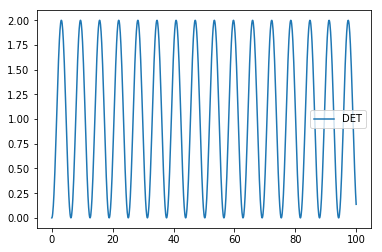

In [6]:
plt.plot(results['time'], results['DET'], label='DET')
plt.legend(loc='best')

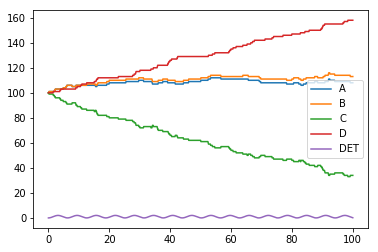

In [7]:
plt.plot(results['time'], results['A'], label='A')
plt.plot(results['time'], results['B'], label='B')
plt.plot(results['time'], results['C'], label='C')
plt.plot(results['time'], results['D'], label='D')
plt.plot(results['time'], results['DET'], label='DET')
plt.legend(loc='best')

In [23]:
%time results_SSA = model.run(solver=BasicSSASolver(), show_labels=True)

CPU times: user 4.81 ms, sys: 154 µs, total: 4.96 ms
Wall time: 4.88 ms


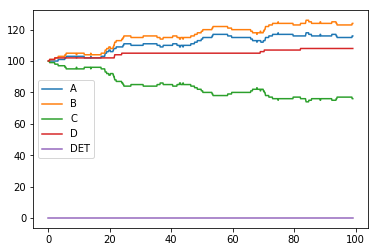

In [24]:
plt.plot(results_SSA['time'], results_SSA['A'], label='A')
plt.plot(results_SSA['time'], results_SSA['B'], label='B')
plt.plot(results_SSA['time'], results_SSA['C'], label='C')
plt.plot(results_SSA['time'], results_SSA['D'], label='D')
plt.plot(results_SSA['time'], results_SSA['DET'], label='DET')
plt.legend(loc='best')

In [9]:
#results = model.run(solver=BasicRootSolver(), show_labels=True)

In [10]:
# plt.plot(results['time'], results['A'], label='A')
# plt.plot(results['time'], results['B'], label='B')
# plt.plot(results['time'], results['C'], label='C')
# plt.plot(results['time'], results['D'], label='D')
# plt.plot(results['time'], results['DET'], label='DET')
# plt.legend(loc='best')

In [11]:
# print(results)

In [12]:
numpy.linspace(0,100,1001)

array([  0. ,   0.1,   0.2, ...,  99.8,  99.9, 100. ])

In [13]:
results['DET']

[0,
 0.00499583481175721,
 0.019933423266665168,
 0.04466351674746809,
 0.07893902041955478,
 0.12241746208382966,
 0.1746644385337057,
 0.2351579332517159,
 0.3032935151667324,
 0.3783903991234336,
 0.45969826061882757,
 0.5464047133675451,
 0.6376434260533589,
 0.732502778723386,
 0.8300349709787502,
 0.9292654867479984,
 1.0292020760070908,
 1.128845247039111,
 1.2272011181249898,
 1.3232867451258568,
 1.4161420451813278,
 1.5048392213352084,
 1.5884920264503788,
 1.6662646157636665,
 1.73737989903903,
 1.8011273023736643,
 1.856869869541315,
 1.9040506267115243,
 1.9421981492938545,
 1.9709312787206297,
 1.989962961841192,
 1.9991035693500043,
 1.9982616687129868,
 1.9874452935211535,
 1.9667625356272167,
 1.936419771451057,
 1.896720227158187,
 1.848060575605419,
 1.7909270062301212,
 1.7258903744067235,
 1.653600499688155,
 1.5747796737078574,
 1.4902154433911452,
 1.4007527414068965,
 1.3072854457376935,
 1.2107474473310371,
 1.112103321846116,
 1.012338709345588,
 0.91245219816

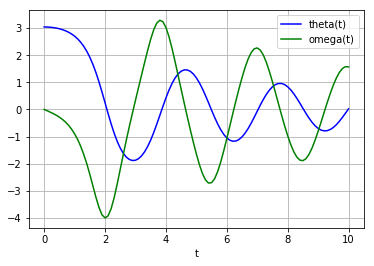

d [1]


In [27]:
def pend(y, t, b, c, d):
    theta, omega = y
    dydt = [omega, -b*omega - c*numpy.sin(theta)]
    d[0] = 1
    return dydt
d = [0]
b = 0.25
c = 5.0
y0 = [numpy.pi - 0.1, 0.0]
t = numpy.linspace(0, 10, 101)

from scipy.integrate import odeint
sol = odeint(pend, y0, t, args=(b, c, d))

import matplotlib.pyplot as plt
plt.plot(t, sol[:, 0], 'b', label='theta(t)')
plt.plot(t, sol[:, 1], 'g', label='omega(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()
print('d',d)

In [15]:
sol.shape

(101, 2)